# TP2: Procesamiento de datos RRBS

> **Nota**: Este cuaderno asume que el [TP0](https://colab.research.google.com/github/VeronicaNoe/EpiEvo/blob/main/cuadernos/TP0_espacio_de_trabajo.ipynb) ha sido completado con éxito.


## Introducción

### Metilación de citosinas



* La metilación del ADN es uno de los cambios epigenéticas más imporantes. 

* Entre los cambios epigenéticos se encuentra la metilación de citosinas en donde un grupo metilo (CH$_3$-) e**s añadido en el 5to carbono de una citosina**. (AGREGAR)

<p align="center">
  <img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/2/metilada_no_metilada.png" width="600"/>
</p>

**INDICAR EL NUMERO DE CARBONO**

* En genomas de plantas, dicha metilación suele ocurrir en los siguientes contextos de secuencia 5'→3':

  * CpG (CG)
  * CHG
  * CHH

**Nota**: La base [H](https://www.bioinformatics.org/sms/iupac.html) indica cualquier nucleótido excepto G. Por ejemplo, CHG -> CAG, CCG, CTG.

### RRBS: **R**educed **R**epresentation **B**isulfite **S**equencing

* Es un método para identificar metilación del ADN a escala genómica y con alta resolución ([Meissner et al., 2005](https://doi.org/10.1093/nar/gki901)).

* Combina el tratamiento de bisulfito con el uso de enzimas de restricción.

* En comparación a otros métodos, RRBS es una técnica no costosa y requiere conocer la secuencia del genoma a ser tratado (también llamada **referencia**).

<a name="prot-RRBS"></a>
#### Protocolo RRBS

1.   **Digestión del ADN** con un enzima de restricción insensible a la metilación. 

  <p align="center">
  <img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/2/1_RRBS_protocolo.png" width="800"/>
  </p>
  
  * La endonucleasa MspI es generalmente utilizada como enzima de restricción.
  * Esta enzima se enlaza a la secuencia de ADN 5'-CCGG-3' y corta el enlace fosfodiéster agua arriba de CG.
  * Fragmentos resultantes con **CG en su extremo 5'**.

    <p align='center'>
      <img src='https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/2/1_mspI.png' width=800/>
    </p>

2.   **Reparación de extremos**. Para evitar la hibridización de los extremos de ADN digerido, que son cohesivos ("sticky ends"), el extremo 3' es extendido con **2 bp** y una cola A.

  <p align="center">
  <img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/2/2_reparacion_extremos.png" width="800"/>
  </p>


3.   **Ligadura de adaptadores**, para posterior secuenciación masiva.

  <p align="center">
  <img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/2/1_RRBS_protocolo_paso2.png" width="800"/>
  </p>

4.   **Tratamiento con bisulfito**.

  * Al tratar el ADN con [bisulfito de sodio](https://es.wikipedia.org/wiki/Bisulfito_s%C3%B3dico), las citosinas no metiladas **son** deaminizadas en uracilos, mientras que las citosinas metiladas **no son** afectadas. 

  <p align="center">
    <img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/2/tratamiento_bisulfito.png" width="600"/>
  </p>

  <p align="center">
    <img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/2/tratamiento_bisulfito_2.png" width="200"/>
  </p>

5.   **Amplificación por PCR**.

  <p align="center">
    <img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/2/amplificacion_pcr.png" width="600"/>
  </p>

6.   **Secuenciación masiva**.

### Secuenciación masiva



* Tecnología para determinar la secuencia de nucleótidos en regiones de ADN. 

* A diferencia de la secuenciación Sanger, la secuenciación masiva genera un gran número de lecturas (*reads*).

* Con instrumentos Illumina, la secuenciación consiste en tres grandes pasos:

  1. Adhesión de fragmentos de ADN a la celda de flujo (*flow cell*) de Illumina.

  <p align="center">
  <img src='https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/2/2_illumina_paso1.png' width=300 />
  </p>

  2. Amplificación PCR de fragmentos adheridos.

  <p align="center">
  <img src='https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/2/2_illumina_paso2.png' width=300 />
  </p>
  
  3. Detección de bases por fluorescencia.

  <p align="center">
  <img src='https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/2/2_illumina_paso3.png' width=300 />
  </p>






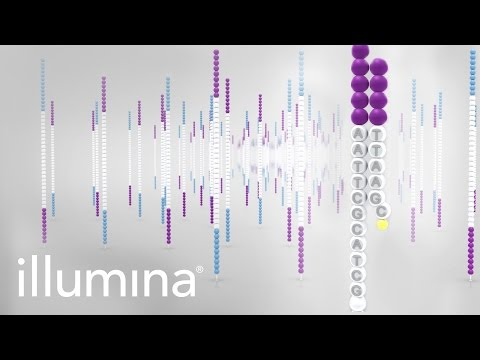

In [ ]:
#@title Tecnología Illumina
from IPython.display import YouTubeVideo
YouTubeVideo('fCd6B5HRaZ8', width=800, height=400)

#### Adaptadores

* Debido a que la secuenciación comienza en la primera base del fragmento de ADN, el adaptador no es secuenciado al comienzo de la lectura

* Si la secuenciación se extiende más allá del fragmento, el extremo 3' de la lectura tendrá el adaptador.

  <p align="center">
  <img src='https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/2/2_illumina_paso4.png' width=300 />
  </p>

* **HAY VARIOS ADAPTADORES. UNO DE ELLOS ES: <font color='blue'>AGATCGGAAGAGCACACGTCTGAACTCCAGTCA</font>. VARIOS PROGRAMAS TIENEN PRECARGADOS LOS ADAPTADORES PARA CADA LIBRERIA.**



#### Archivo FASTQ


  <p align="center">
  <img src='https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/2/generacion_fastq.png' width=700 />
  </p>

* Las lecturas generadas por secuenciación son generalmente guardadas en archivos con extensión `fastq` (o `fastq.gz`).

* El formato FASTQ es texto plano. 

* Cada lectura es descripta por cuatro lineas de texto. Por ejemplo, una lectura en un archivo FASTQ luce así:

```
@SEQ_ID
GATTTGGGGTTCAAAGCAGTATCGATCAAATAGTAAATCCATTTGTTCAACTCACAGTTT
+
!''*((((***+))%%%++)(%%%%).1***-+*''))**55CCF>>>>>>CCCCCCC65
```

* Línea 1: identificador de la lectura.
* Línea 2: la secuencia de bases.
* Línea 3: caracter '+'.
* Línea 4: valores de calidad de la secuenciación de bases.



##### Calidad de secuenciación



Hay diferentes formatos para codificar calidades. Por ejemplo, el siguiente formato (Phread+33) un caracter para codificar un valor de calidad desde 0 a 40.

```
!"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHI
|                         |    |        |
0........................26...31.......40 
```

Estos valores de calidad, también llamados niveles de calidad [Phred](https://es.wikipedia.org/wiki/Nivel_de_calidad_Phred), significan

| Valor Phred | Prob. de base incorrecta | Precisión |
| :------------- | :---------- | :----------- |
| 10 | 1 en 10                         | 90%  |
| 20 | 1 en 1.000                      | 99% |
| 30 | 1 en 10.000                     | 99,9% |
| 40 | 1 en 100.000                    | 99,99% |

## Contenido



**Objetivo:** Familiarizarse con la identificación de citosinas metiladas usando [datos RRBS públicos](https://www.ncbi.nlm.nih.gov/sra/SRX114995) del roble _Quercus lobata_.

<table>
<tr>
<td>
<p align='center'>
<img src="https://upload.wikimedia.org/wikipedia/commons/8/86/Valley_Oak_Mount_Diablo.jpg" width=350/>
</p>
</td>
</tr>
<tr>
<td>
<p align='center'>
<em>Quercus lobata</em>
</p>
</td>
</tr>
</table>

0.   [Preparación de cuaderno](#step-0)
1.   [Control de calidad](#step-1)
2.   [Recorte de calidad y adaptadores](#step-2)
3.   [Control de calidad pos-recorte](#step-3)
4.   [Alineación de datos RRBS](#step-4)
5.   [Identificación de citosinas metiladas](#step-5)

## Paso 0. Preparación de cuaderno

In [ ]:
#@title Incluir librerías
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from google.colab import drive

In [ ]:
#@title Instalar programas
%%bash
apt-get -y install fastqc > /dev/null 2>&1
apt-get -y install samtools > /dev/null 2>&1
pip install -U cutadapt > /dev/null 2>&1

# install trim galore
curl -fsSL https://github.com/FelixKrueger/TrimGalore/archive/0.6.6.tar.gz -o trim_galore.tar.gz > /dev/null 2>&1
tar xvzf trim_galore.tar.gz > /dev/null 2>&1
cp -r TrimGalore-0.6.6 /usr/local/bin
ln -sf /usr/local/bin/TrimGalore-0.6.6/trim_galore /usr/local/bin

# install bowtie
wget https://razaoinfo.dl.sourceforge.net/project/bowtie-bio/bowtie2/2.4.4/bowtie2-2.4.4-linux-x86_64.zip > /dev/null 2>&1

unzip -o bowtie2-2.4.4-linux-x86_64.zip > /dev/null 2>&1
cp -r bowtie2-2.4.4-linux-x86_64 /usr/local/bin
ln -sf /usr/local/bin/bowtie2-2.4.4-linux-x86_64/bowtie2 /usr/local/bin
ln -sf /usr/local/bin/bowtie2-2.4.4-linux-x86_64/bowtie2-build /usr/local/bin

# install bismark
wget https://github.com/FelixKrueger/Bismark/archive/refs/tags/0.23.1.tar.gz > /dev/null 2>&1
tar xfz 0.23.1.tar.gz
cp -r Bismark-0.23.1 /usr/local/bin
ln -sf /usr/local/bin/Bismark-0.23.1/bismark /usr/local/bin
ln -sf /usr/local/bin/Bismark-0.23.1/bismark_genome_preparation	/usr/local/bin
ln -sf /usr/local/bin/Bismark-0.23.1/bismark_methylation_extractor /usr/local/bin
ln -sf /usr/local/bin/Bismark-0.23.1/coverage2cytosine /usr/local/bin
ln -sf /usr/local/bin/Bismark-0.23.1/bismark2bedGraph /usr/local/bin

# check installations
#cutadapt --version
#trim_galore --version
#samtools --version
#bowtie2 --version
#bismark --version

# clean
rm -rf *.gz *.zip Bismark* bowtie* TrimGalore*

In [ ]:
#@title Autorizar acceso a Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title Obtener datos RRBS
# RRBS data
dir_tp     = '/content/drive/MyDrive/EpiEvo/epievo_data/2'
acc        = 'SRR3125071'
fas_name   = 'NC_044905.fasta'
fastq_name = f"{acc}.fastq.gz"
fastq_file = os.path.join(dir_tp, fastq_name)
fas_file   = os.path.join(dir_tp, fas_name)

# FastQC
fastqc_file = f"{acc}_fastqc.zip"
fastqc_dir  = f"{acc}_fastqc/Images"

# Trimmed fastq
trimmed_fastq_file = f"{acc}_trimmed.fq.gz"

# FastQC post-trimming
trimmed_fastqc     = f"{acc}_trimmed_fastqc.zip"
trimmed_fastqc_dir = f"{acc}_trimmed_fastqc/Images"

!ln -nfs {fastq_file} .
!ls

!mkdir ref
!cp {fas_file} ref

drive  sample_data  SRR3125071.fastq.gz


In [ ]:
#@title Prepracion de archivos
# remove this cell when finished implementing the notebook
%cd /content/drive/MyDrive/exp/21/ga-curso-epi/TP3/la-last-version
%cd /content/drive/MyDrive/exp/21/ga-curso-epi/epievo_data/2
!ls /content/drive/MyDrive/exp/21/ga-curso-epi/epievo_data/2

/content/drive/MyDrive/exp/21/ga-curso-epi/TP3/la-last-version


<a name="paso1"></a>
## Paso 1. Control de calidad

* Para evitar falsas identificaciones de citosinas metiladas, la secuenciación tiene que estar libre de errores.

* El control de calidad permite determinar la calidad de la secuenciación y  potenciales errores de secuenciación. 

* Para el control de calidad, utilizaremos la herramienta [FastQC](https://www.bioinformatics.babraham.ac.uk/projects/fastqc/).

* `FastQC` toma un archivo FASTQ desde el cual genera diversos reportes para medir la calidad de la secuenciación.

### Generar reportes

In [ ]:
#@title Generar reportes de calidad
#@markdown Los reportes generados se encuentran comprimidos en un archivo `.zip`.
!fastqc {fastq_name} > /dev/null 2>&1
!unzip {fastqc_file} > /dev/null 2>&1
#!ls

### Analizar reportes


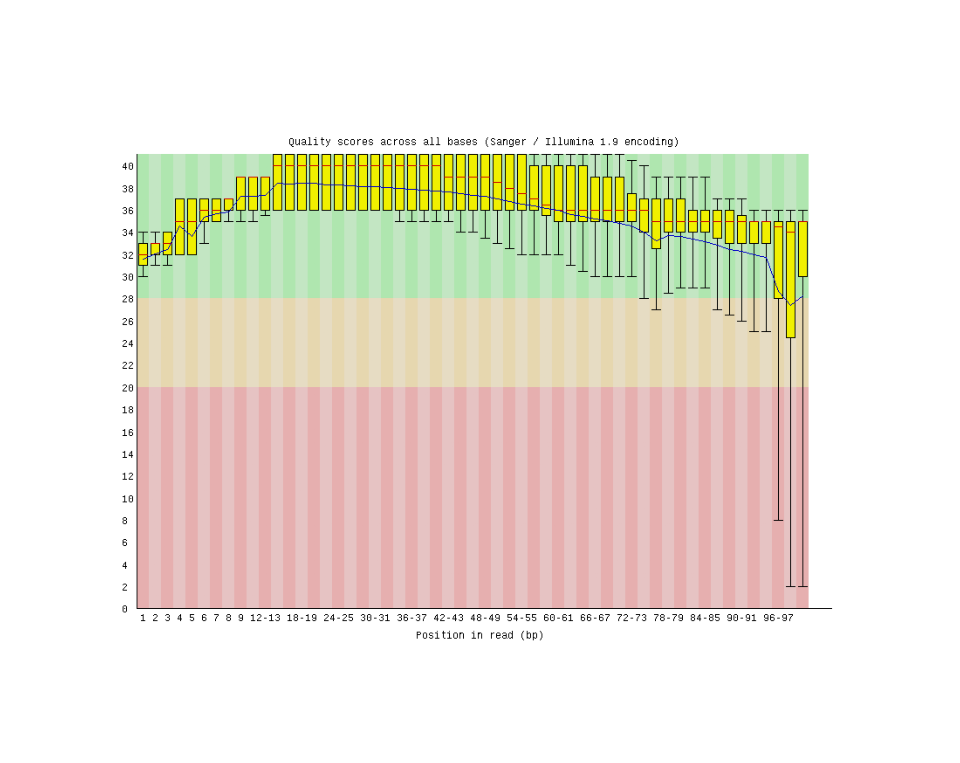

In [ ]:
#@title Calidad por base

figs, axs = plt.subplots(dpi=1200, figsize=(.6,.6))
figs.subplots_adjust(0,0,1,1)
img = mpimg.imread(os.path.join(fastqc_dir, 'per_base_quality.png'))
imgp = imgplot = plt.imshow(img)
axs.axis('off')
plt.show()

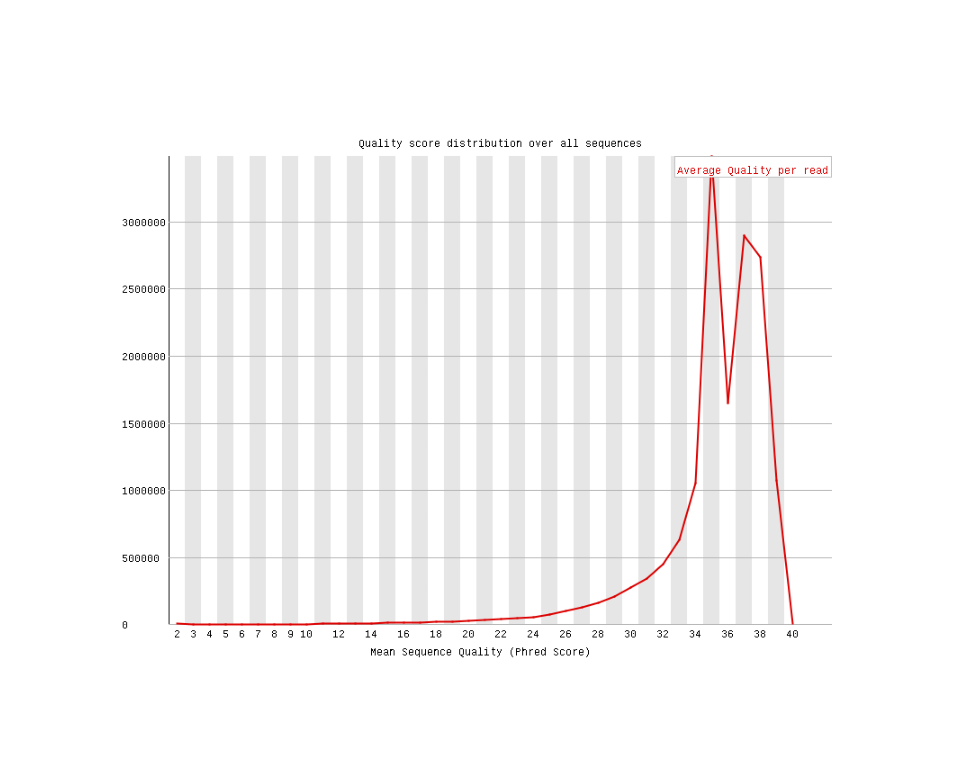

In [ ]:
#@title Calidad por lectura
figs, axs = plt.subplots(dpi=1200, figsize=(.6,.6))
figs.subplots_adjust(0,0,1,1)
img = mpimg.imread(os.path.join(fastqc_dir, 'per_sequence_quality.png'))
imgplot = plt.imshow(img)
axs.axis('off')
plt.show()

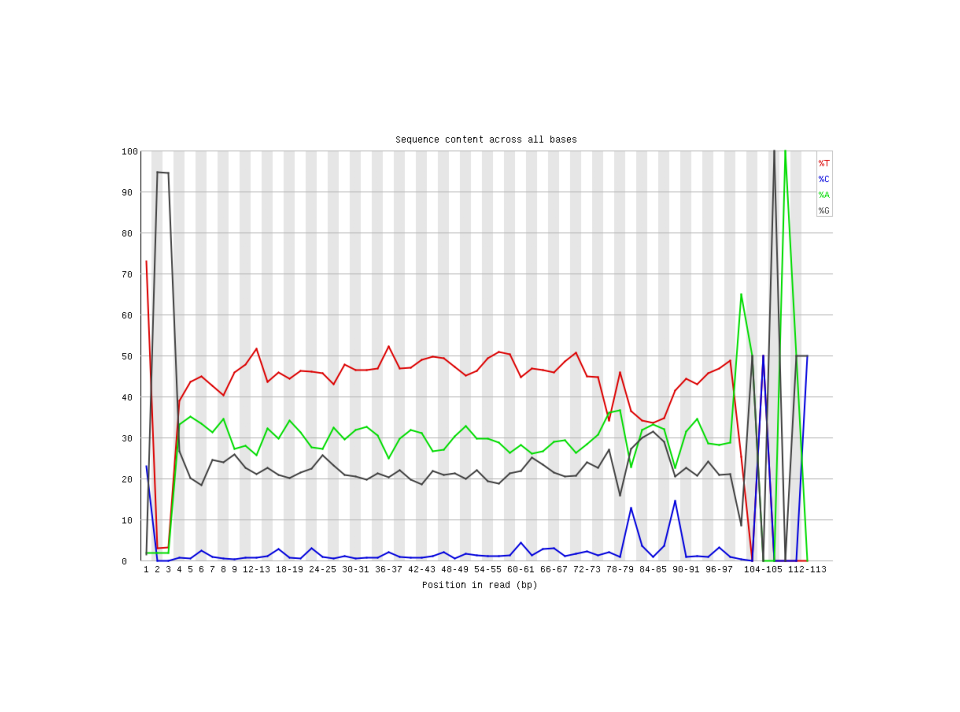

In [ ]:
#@title Composición de bases
#@markdown * Debido a la acción del bisulfito de sodio, y a que el numero de citosinas metiladas es mucho menor que al de las no metiladas, el contenido de citosinas suele ser bastante reducido en datos RRBS.

#@markdown * Por otro lado, debido a que el ADN fue digerido por [MspI](#MspI) (sitio de reconocimiento: `CCGG`), las lecturas deberían comenzar con `CGG` o `TGG`, dependiendo si la primera `C` está metilada.

figs, axs = plt.subplots(dpi=1200, figsize=(.6,.6))
figs.subplots_adjust(0,0,1,1)
img = mpimg.imread(os.path.join(fastqc_dir, 'per_base_sequence_content.png'))
imgplot = plt.imshow(img)
axs.axis('off')
plt.show()

**Poner dibujo con adaptadores**

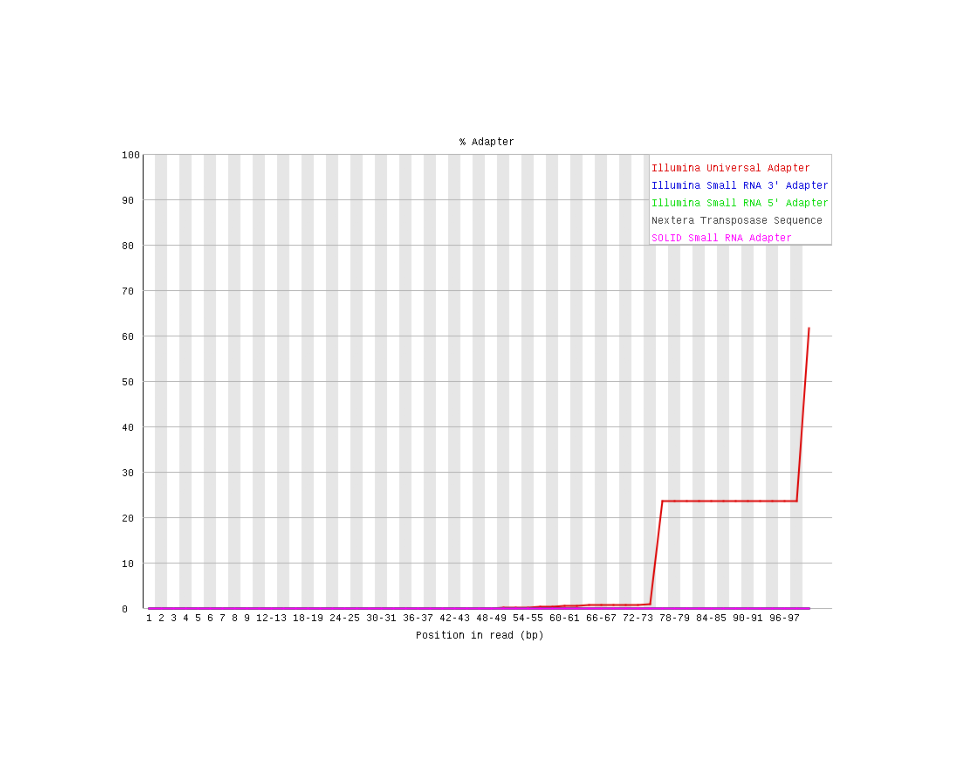

In [ ]:
#@title Contenido de adaptadores

fig, axs = plt.subplots(dpi=1200, figsize=(.6,.6))
fig.subplots_adjust(0,0,1,1)
img = mpimg.imread(os.path.join(fastqc_dir, 'adapter_content.png'))
imgplot = plt.imshow(img)
axs.axis('off')
#fig.tight_layout()
plt.show()

<a name="paso2"></a>
## Paso 2. Recorte de calidad y adaptadores

* Herramientas de "cortado" puede utilizarse para remover adaptadores y bases de baja calidad.

* Una de esas herramientas es [Trim Galore](https://www.bioinformatics.babraham.ac.uk/projects/trim_galore/).

* Algunas de las opciones relevantes para ejecutar `Trim Galore` son las siguientes:

>   * opción `--illumina` remover el adaptador universal de Illumina (`AGATCGGAAGAGC`).
>   * opción `--rrbs` remover los 2 bp adicionales del extremo 3' durante la reparación de extremos del protocolo de RRBS. 
>   * opción `--quality <INT>` cortar extremos de lecturas con calidades por debajo de `<INT>`.




In [ ]:
#@title Ejecutar cortado
# https://github.com/FelixKrueger/TrimGalore/blob/master/Docs/Trim_Galore_User_Guide.md
!trim_galore --phred33 \
             --illumina \
             --rrbs \
             --quality 40 \
             --trim-n \
             {fastq_name} > /dev/null 2>&1

<a name="paso-3"></a>
## Paso 3. Control de calidad pos-recorte

La efectividad del recorte puede verificarte efectuando un nuevo control de calidad con los datos recortados. 

### Generar reportes

In [ ]:
#@title Generar reportes de calidad
!fastqc {trimmed_fastq_file} > /dev/null 2>&1
!unzip {trimmed_fastqc} > /dev/null 2>&1

### Analizar reportes

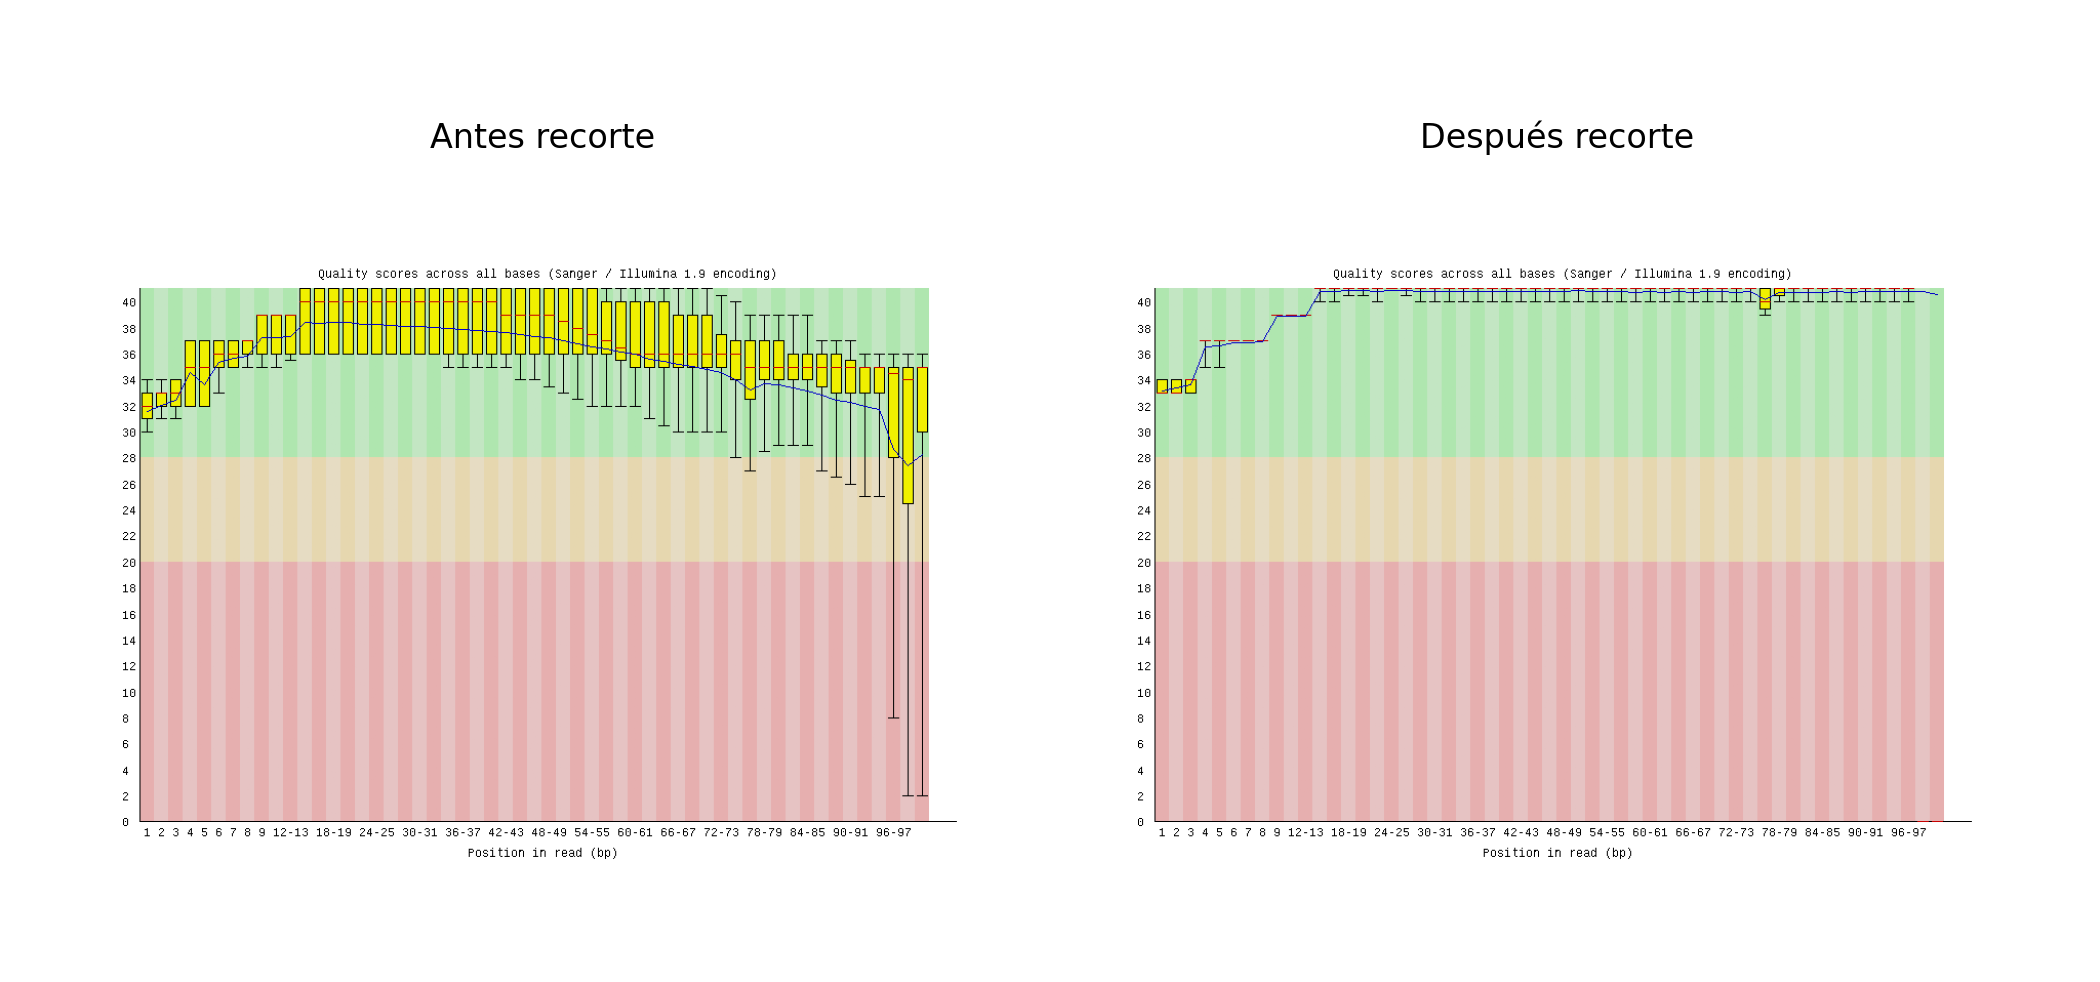

In [ ]:
#@title Calidad por base
figs, axs = plt.subplots(1, 2, dpi=1200, figsize=(2,2))

after_img  = mpimg.imread(os.path.join(fastqc_dir, 'per_base_quality.png'))
before_img = mpimg.imread(os.path.join(trimmed_fastqc_dir, 'per_base_quality.png'))

axs[0].imshow(after_img)
axs[0].axis('off')
axs[0].title.set_size(2)
axs[0].title.set_text('Antes recorte')

axs[1].imshow(before_img)
axs[1].axis('off')
axs[1].title.set_size(2)
axs[1].title.set_text('Después recorte')
plt.show()

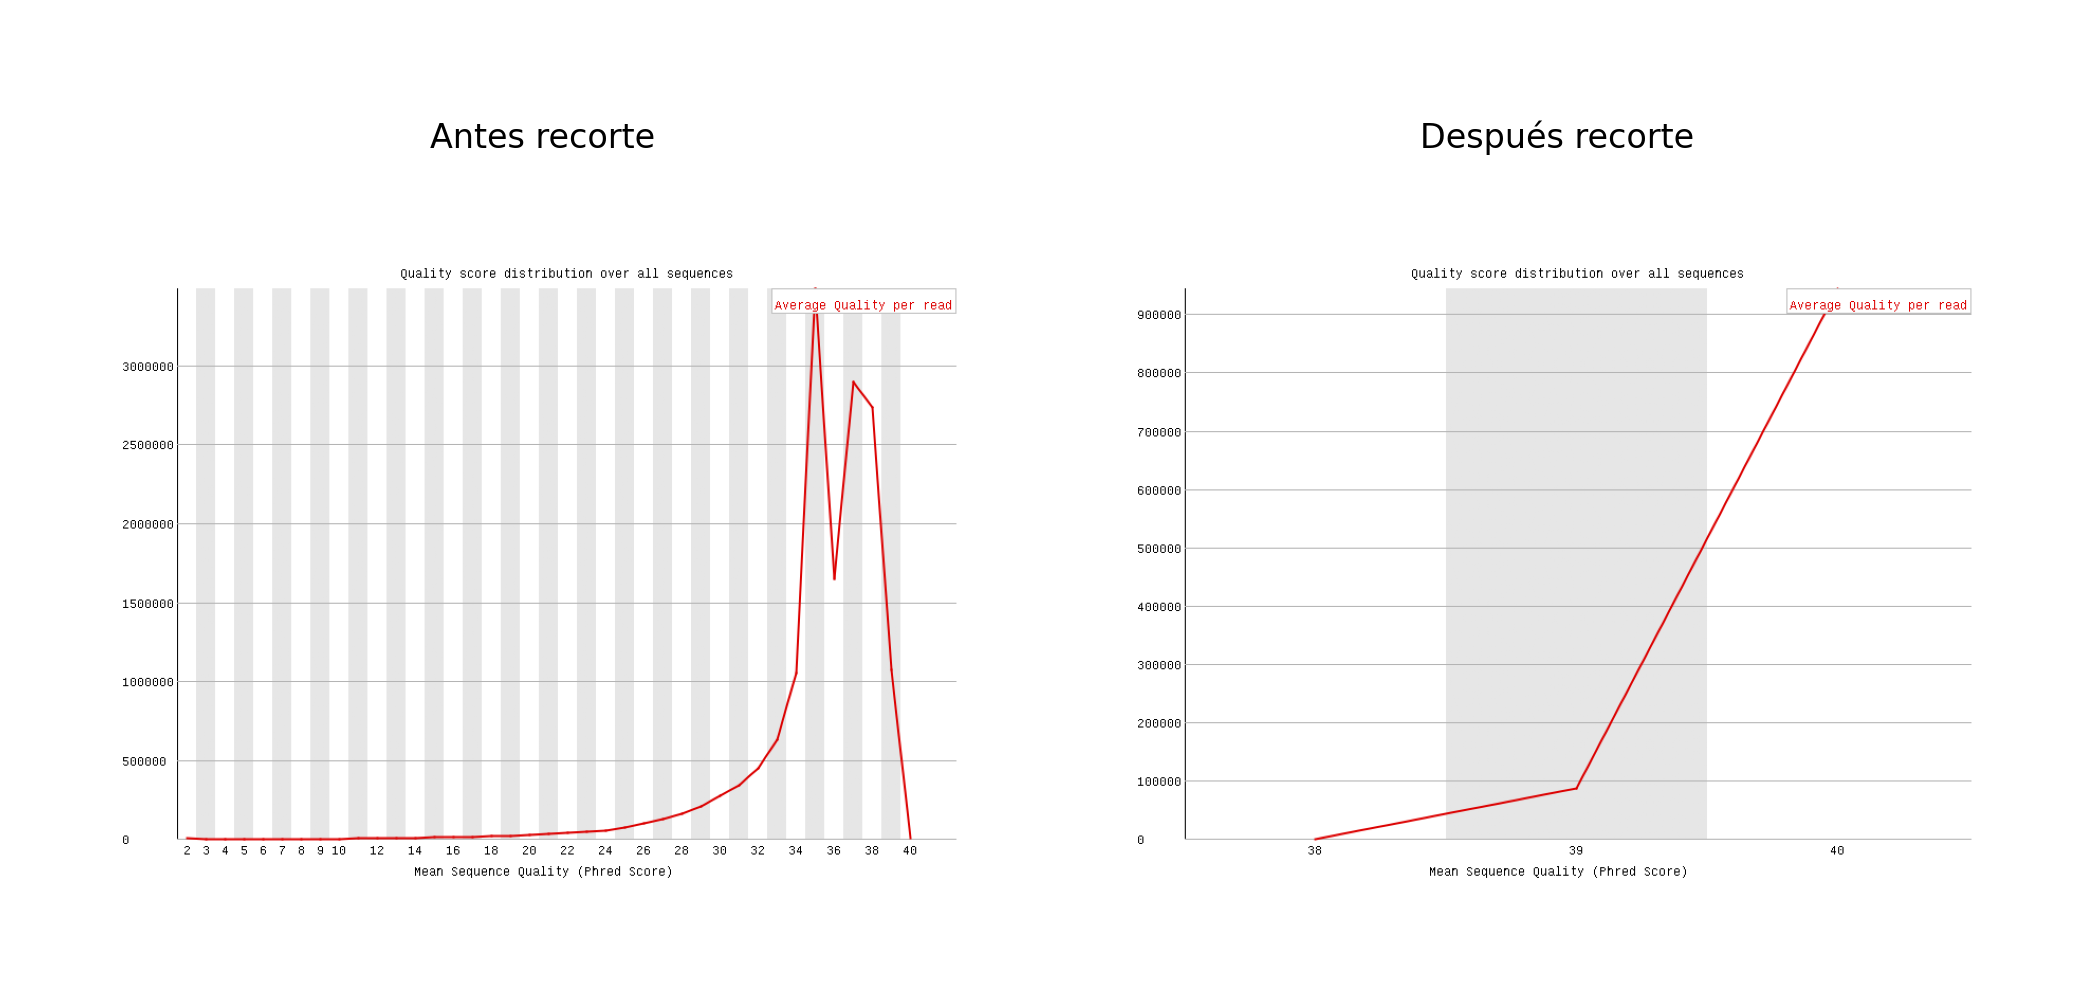

In [ ]:
#@title Calidad por lectura
figs, axs = plt.subplots(1, 2, dpi=1200, figsize=(2,2))

after_img  = mpimg.imread(os.path.join(fastqc_dir, 'per_sequence_quality.png'))
before_img = mpimg.imread(os.path.join(trimmed_fastqc_dir, 'per_sequence_quality.png'))

axs[0].imshow(after_img)
axs[0].axis('off')
axs[0].title.set_size(2)
axs[0].title.set_text('Antes recorte')

axs[1].imshow(before_img)
axs[1].axis('off')
axs[1].title.set_size(2)
axs[1].title.set_text('Después recorte')
plt.show()

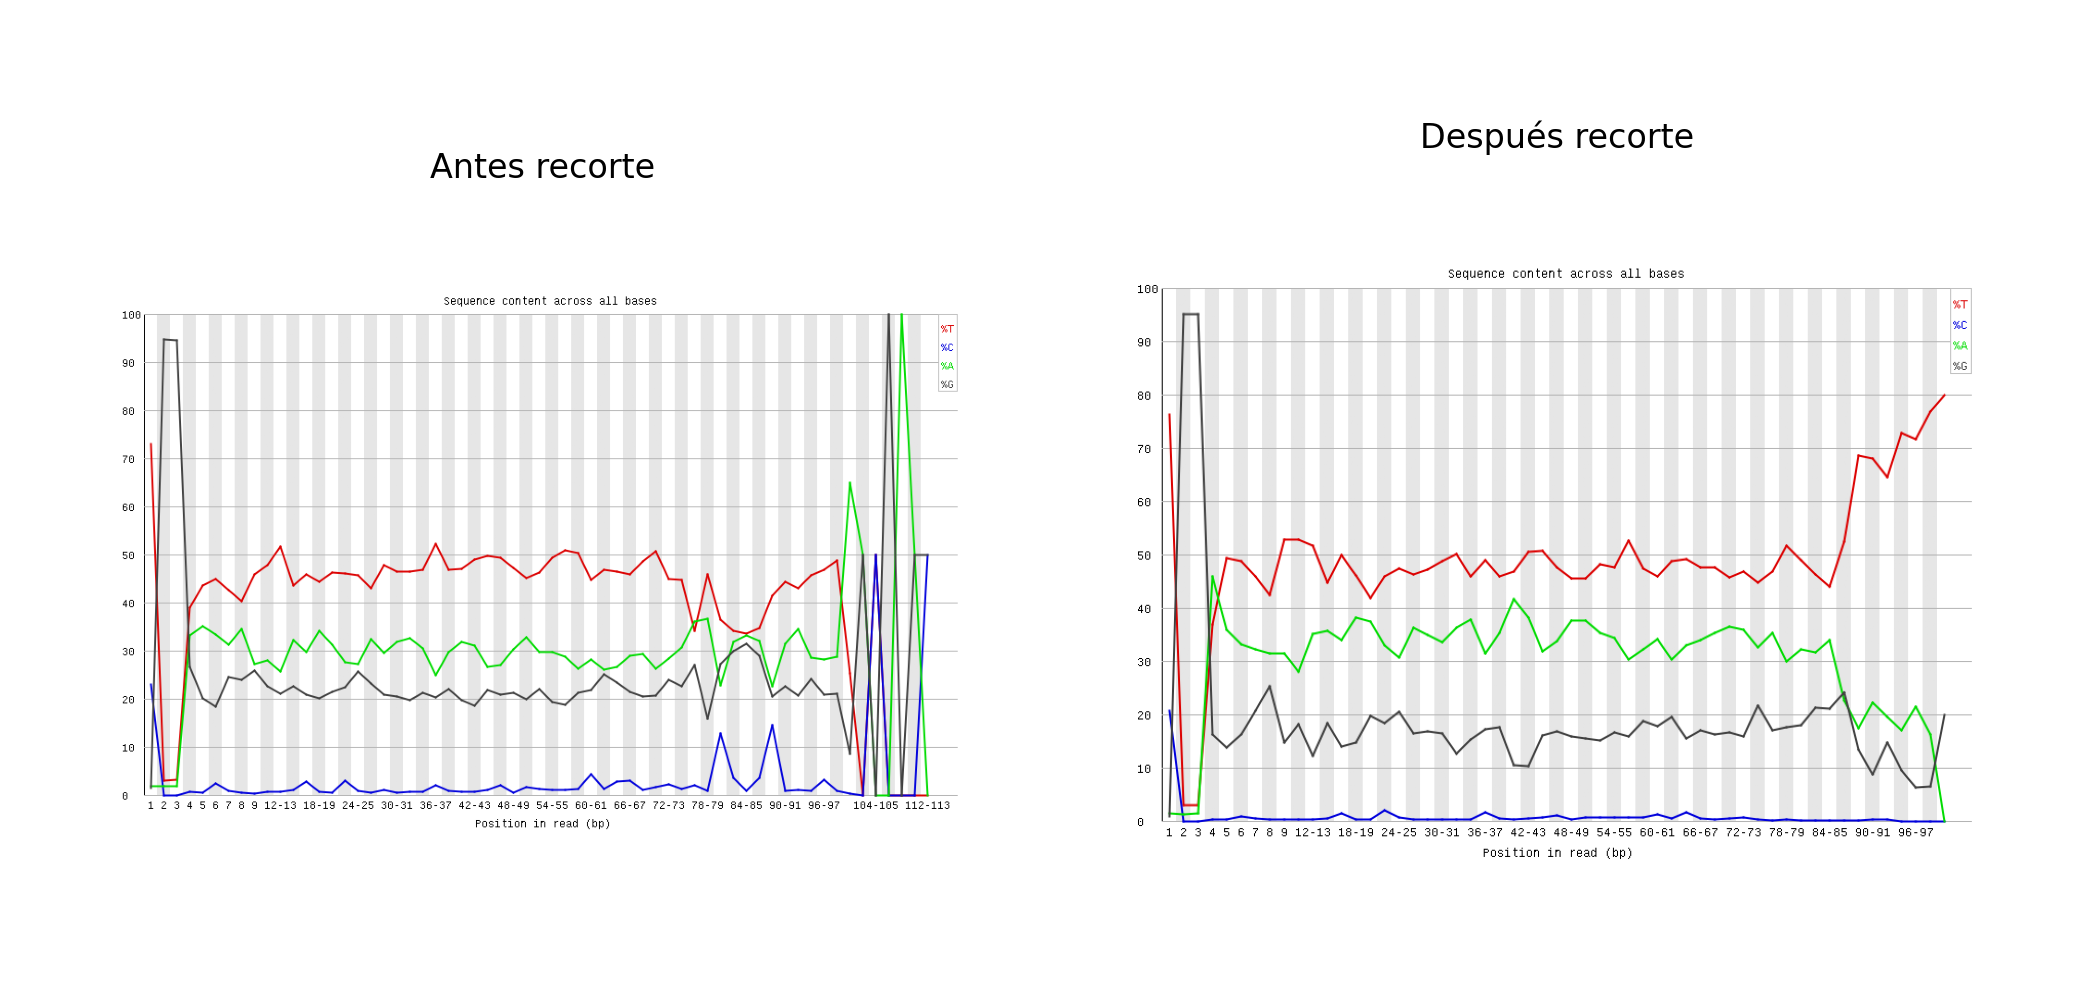

In [ ]:
#@title Composición de bases
figs, axs = plt.subplots(1, 2, dpi=1200, figsize=(2,2))

after_img  = mpimg.imread(os.path.join(fastqc_dir, 'per_base_sequence_content.png'))
before_img = mpimg.imread(os.path.join(trimmed_fastqc_dir, 'per_base_sequence_content.png'))

axs[0].imshow(after_img)
axs[0].axis('off')
axs[0].title.set_size(2)
axs[0].title.set_text('Antes recorte')

axs[1].imshow(before_img)
axs[1].axis('off')
axs[1].title.set_size(2)
axs[1].title.set_text('Después recorte')
plt.show()

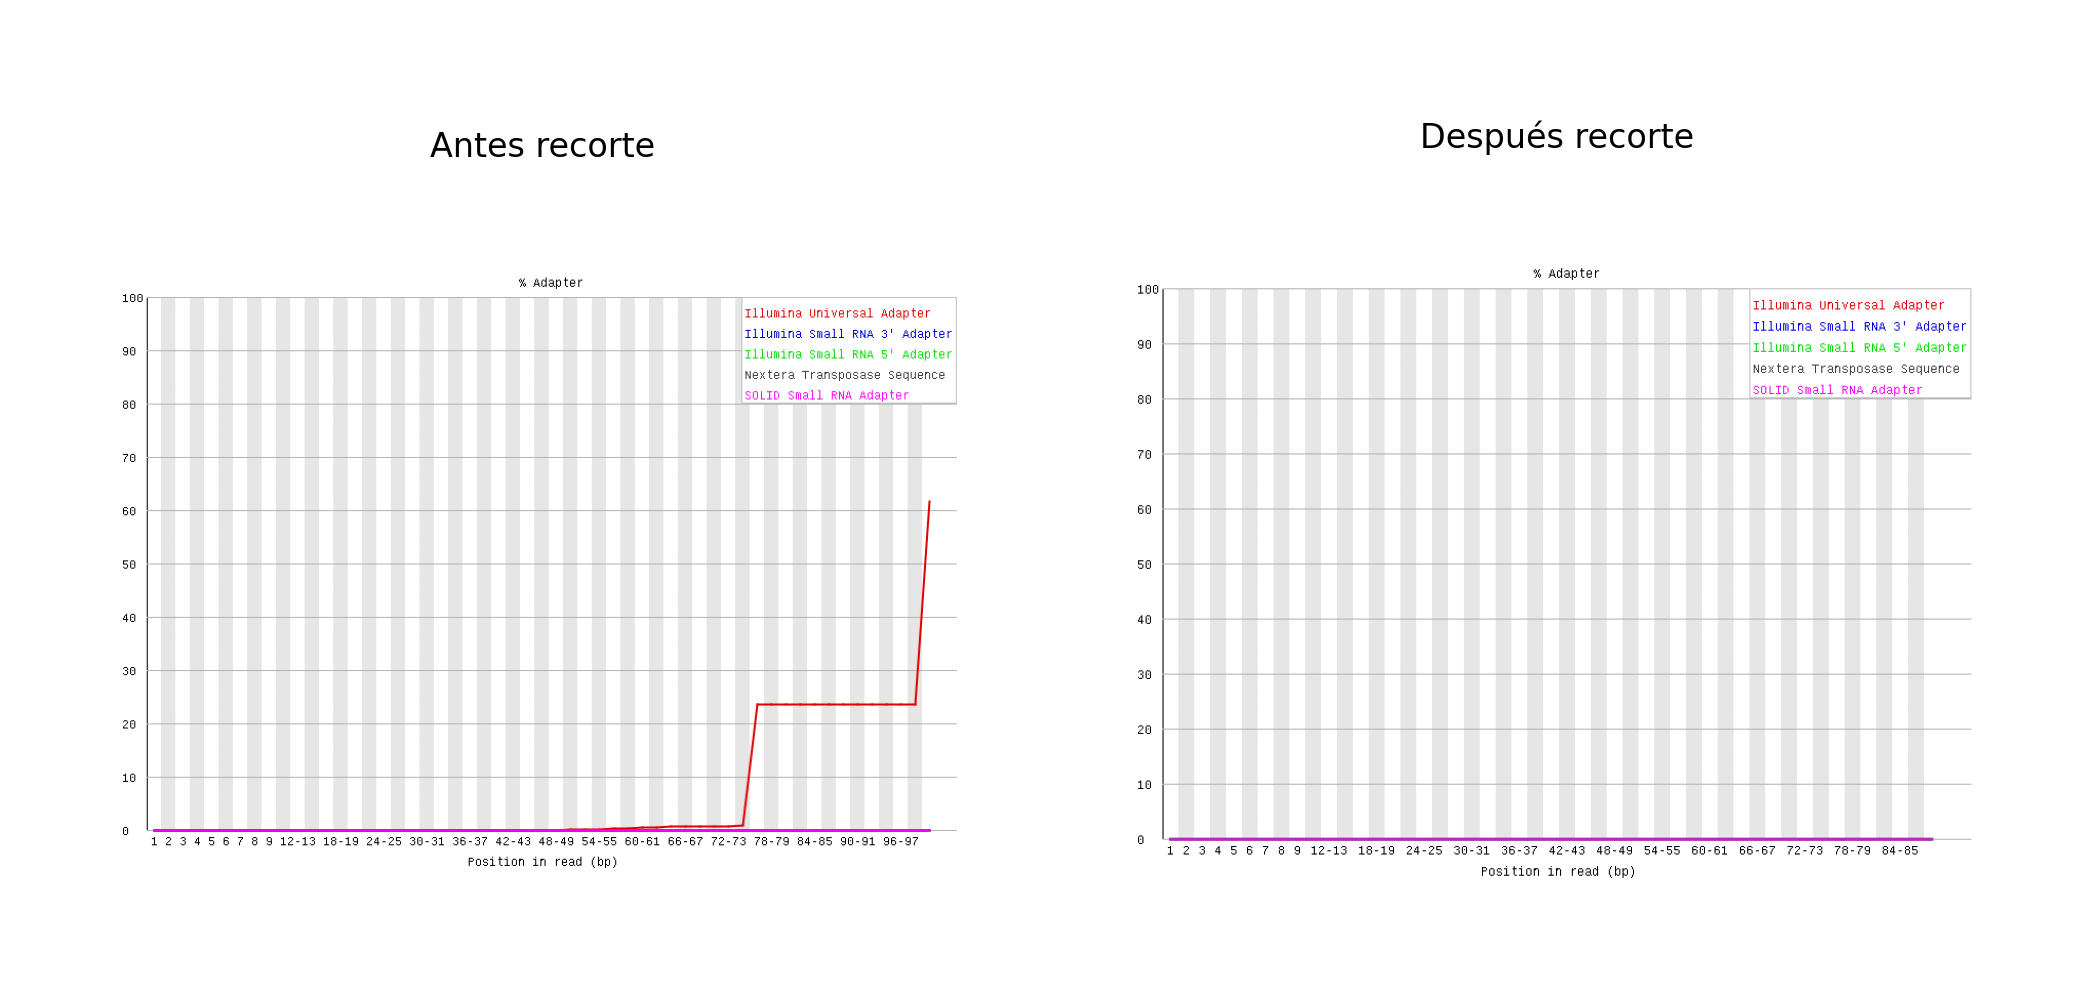

In [ ]:
#@title Contenido de adaptadores
figs, axs = plt.subplots(1, 2, dpi=1200, figsize=(2,2))

after_img  = mpimg.imread(os.path.join(fastqc_dir, 'adapter_content.png'))
before_img = mpimg.imread(os.path.join(trimmed_fastqc_dir, 'adapter_content.png'))

axs[0].imshow(after_img)
axs[0].axis('off')
axs[0].title.set_size(2)
axs[0].title.set_text('Antes recorte')

axs[1].imshow(before_img)
axs[1].axis('off')
axs[1].title.set_size(2)
axs[1].title.set_text('Después recorte')
plt.show()

## Paso 4. Alineamiento de lecturas

* Usando las lecturas generadas desde los fragmentos de ADN tratados con bisulfito, `Bismark` [(Krueger & Andrews)](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3102221/pdf/btr167.pdf) las alinea sobre un genoma de referencia. 

* Este alineamiento es computacionalmente desafiante, por ejemplo por la amplificación por PCR.

* `Bismark` utiliza una estrategía de cuatro alineamientos.






### Estrategia de cuatro alineamientos

<p align="center">
  <img src="https://raw.githubusercontent.com/VeronicaNoe/EpiEvo/main/img/2/bismark_cuatro_alineamientos.png" width="400"/>
</p>

Alineamientos de lectura <tt><font color='red'>TTTT</font>GGG</tt>:

<table>

<tr>
<td>Lectura</td>
<td><tt><font color='red'>TTTT</font>GGG</tt></td>

<td><tt><font color='red'>TTTT</font>GGG</tt></td>

<td><tt><font color='red'>TTTT</font>GGG</tt></td>

<td><tt><font color='red'>TTTT</font>GGG</tt></td>
</tr>
<tr>
<td>Alineamiento</td>
<td><tt>|||||||</tt></td>

<td><tt>-------</tt></td>

<td><tt>-------</tt></td>

<td><tt>-------</tt></td>
</tr>
<tr>
<td>Referencia</td>
<td><tt><font color='red'>TTTT</font>GGG</tt></td>

<td><tt><font color='red'>AAAA</font>CCC</tt></td>

<td><tt>CCCC<font color='blue'>AAA</font></tt></td>

<td><tt>GGGG<font color='blue'>TTT</font></tt></td>
</tr>

<tr>
<td>
Coincidencias
</td>
<td>
7
</td>
<td>
0
</td>
<td>
0
</td>
<td>
0
</td>
</tr>
</table>

Alineamientos de lectura <tt>TTTC<font color='blue'>AAA</font></tt>:

<table>

<tr>
<td>Lectura</td>
<td><tt>TTTC<font color='blue'>AAA</font></tt></td>

<td><tt>TTTC<font color='blue'>AAA</font></tt></td>

<td><tt>TTTC<font color='blue'>AAA</font></tt></td>

<td><tt>TTTC<font color='blue'>AAA</font></tt></td>
</tr>
<tr>
<td>Alineamiento</td>
<td><tt>|||----</tt></td>

<td><tt>-------</tt></td>

<td><tt>---||||</tt></td>

<td><tt>-------</tt></td>
</tr>
<tr>
<td>Referencia</td>
<td><tt><font color='red'>TTTT</font>GGG</tt></td>

<td><tt><font color='red'>AAAA</font>CCC</tt></td>

<td><tt>CCCC<font color='blue'>AAA</font></tt></td>

<td><tt>GGGG<font color='blue'>TTT</font></tt></td>
</tr>
<tr>
<td>Coincidencias</td>
<td>
3
</td>
<td>
0
</td>
<td>
4
</td>
<td>
0
</td>
</tr>
</table>

### A. Preparar genoma de referencia


**VAMOS A USAR EL CHROMOSOMA 12!!!!!!!**

* Antes de ejecutar los alineamientos, el genoma usado como referencia necesita ser tratado con bisulfito `in-silico`, y luego indexado.

* Para un genoma dado, `Bismark` creará dos versiones del genoma: uno donde `C->T` y otro donde `G->A`.

* Luego estos dos genomas son indexados con `Bowtie2`.

* **Para reducir el costo computacional, trabajaremos con el chr12**

In [ ]:
#@title Preparar genomas
!bismark_genome_preparation --bowtie2 --genomic_composition ./ref > /dev/null 2>&1

In [ ]:
#@title Verificar genomas
%%bash
echo -en "Ref\t"
head -2 ref/NC_044905.fasta | grep -v ">" | sed 's/\(.\)/\1 /g'
echo -en "C>T\t" 
head -2 ref/Bisulfite_Genome/CT_conversion/genome_mfa.CT_conversion.fa | grep -v ">" | sed 's/\(.\)/\1 /g'
echo ""
echo -en "Ref\t"
head -2 ref/NC_044905.fasta | grep -v ">" | sed 's/\(.\)/\1 /g'
echo -en "G>A\t" 
head -2 ref/Bisulfite_Genome/GA_conversion/genome_mfa.GA_conversion.fa | grep -v ">" | sed 's/\(.\)/\1 /g'

Ref	T T T G T T A A A T T G A G A A A T T A A T T T T T T T T A A A T T A C A T G T T G A T G T G G A T G C T A A A T A A A A T T T T T T A A A 
C-T	T T T G T T A A A T T G A G A A A T T A A T T T T T T T T A A A T T A T A T G T T G A T G T G G A T G T T A A A T A A A A T T T T T T A A A 

Ref	T T T G T T A A A T T G A G A A A T T A A T T T T T T T T A A A T T A C A T G T T G A T G T G G A T G C T A A A T A A A A T T T T T T A A A 
G-A	T T T A T T A A A T T A A A A A A T T A A T T T T T T T T A A A T T A C A T A T T A A T A T A A A T A C T A A A T A A A A T T T T T T A A A 


### B. Alinear datos RRBS

Para alinear lecturas, `Bismark` utiliza [Bowtie2](http://bowtie-bio.sourceforge.net/bowtie2/index.shtml) como alineador.

In [ ]:
#@title Ejecutar alineamiento
!bismark -q -n 1 --genome /content/drive/MyDrive/exp/21/ga-curso-epi/TP3/la-last-version/ref --se SRR3125071_trimmed.fq.gz

Bowtie 2 seems to be working fine (tested command 'bowtie2 --version' [2.4.4])
Output format is BAM (default)
Alignments will be written out in BAM format. Samtools found here: '/usr/bin/samtools'
Reference genome folder provided is /content/drive/MyDrive/exp/21/ga-curso-epi/TP3/la-last-version/ref/	(absolute path is '/content/drive/MyDrive/exp/21/ga-curso-epi/TP3/la-last-version/ref/)'
FastQ format specified
Mapping set to single-end mode (user defined). File names need to be separated by commas [,] or colons [:]! Supplied file names are: SRR3125071_trimmed.fq.gz

Input files to be analysed (in current folder '/content/drive/My Drive/exp/21/ga-curso-epi/TP3/la-last-version'):
SRR3125071_trimmed.fq.gz
Library is assumed to be strand-specific (directional), alignments to strands complementary to the original top or bottom strands will be ignored (i.e. not performed!)
Setting parallelization to single-threaded (default)

Summary of all aligner options:	-q -N 1 --score-min L,0,-0.2 --igno

In [ ]:
!cat SRR3125071_trimmed_bismark_bt2_SE_report.txt

Bismark report for: SRR3125071_trimmed.fq.gz (version: v0.23.1)
Option '--directional' specified (default mode): alignments to complementary strands (CTOT, CTOB) were ignored (i.e. not performed)
Bismark was run with Bowtie 2 against the bisulfite genome of /content/drive/MyDrive/exp/21/ga-curso-epi/TP3/la-last-version/ref/ with the specified options: -q -N 1 --score-min L,0,-0.2 --ignore-quals

Final Alignment report
Sequences analysed in total:	1086309
Number of alignments with a unique best hit from the different alignments:	207641
Mapping efficiency:	19.1%
Sequences with no alignments under any condition:	845714
Sequences did not map uniquely:	32954
Sequences which were discarded because genomic sequence could not be extracted:	0

Number of sequences with unique best (first) alignment came from the bowtie output:
CT/CT:	67018	((converted) top strand)
CT/GA:	140623	((converted) bottom strand)
GA/CT:	0	(complementary to (converted) top strand)
GA/GA:	0	(complementary to (converted) b

## Paso 5. Extracción de citosinas metiladas

* La extracción de citosinas metiladas es realiza desde los alineamientos obtenidos con `Bismark`. Para hacer estas extracciones, utilizaremos la herramienta `bismark_methylation_extractor`.

* Este herramienta extrae cada `C` en ambas hebra del genoma de referencia.

* Debido a que el extractor discrimna entre citosinas con contextos `CpG`, `CHG` y `CHH`, tres archivos dependientes del contexto son generados.

In [ ]:
#@title Ejectuar extractor
!bismark_methylation_extractor --comprehensive \
                               --bedGraph \
                               --CX \
                               --cytosine_report \
                               --genome /content/drive/MyDrive/exp/21/ga-curso-epi/TP3/la-last-version/ref \
                               SRR3125071_trimmed_bismark_bt2.bam


 *** Bismark methylation extractor version v0.23.1 ***

Trying to determine the type of mapping from the SAM header line of file SRR3125071_trimmed_bismark_bt2.bam
Treating file(s) as single-end data (as extracted from @PG line)


Setting core usage to single-threaded (default). Consider using --multicore <int> to speed up the extraction process.

Summarising Bismark methylation extractor parameters:
Bismark single-end SAM format specified (default)
Number of cores to be used: 1
Strand-specific outputs will be skipped. Separate output files for cytosines in CpG, CHG and CHH context will be generated
Output will be written to the current directory ('/content/drive/My Drive/exp/21/ga-curso-epi/TP3/la-last-version')


Summarising bedGraph parameters:
Generating additional output in bedGraph and coverage format
bedGraph format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage>
coverage format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage> <count

In [ ]:
#@title Determinar coverage
!coverage2cytosine --gzip \
                   --CX \
                   --coverage_threshold 1 \
                   --genome_folder ./ref \
                   -o SRR3125071_trimmed_bismark_bt2.bismark.with_cov \
                   SRR3125071_trimmed_bismark_bt2.bismark.cov.gz


Positions coveraged by fewer reads than >1< won't be reported (user defined)

Summary of parameters for genome-wide cytosine report:
Coverage infile:				SRR3125071_trimmed_bismark_bt2.bismark.cov.gz
Output directory:				><
Parent directory:				>/content/drive/My Drive/exp/21/ga-curso-epi/TP3/la-last-version/<
Genome directory:				>/content/drive/My Drive/exp/21/ga-curso-epi/TP3/la-last-version/ref/<
Coverage threshold				1 (user defined)
CX context:					yes
Genome coordinates used:			1-based (default)
GZIP compression:				yes
Split by chromosome:				no


Now reading in and storing sequence information of the genome specified in: /content/drive/My Drive/exp/21/ga-curso-epi/TP3/la-last-version/ref/

Couldn't find files ending in .fa, trying .fa.gz instead
chr NC_044905 (104436548 bp)

Stored sequence information of 1 chromosomes/scaffolds in total

Methylation information will now be written into a genome-wide cytosine report

Adding context-specific methylation summaries

>>> Writing g



```
<chromosome> <position> <strand> <count methylated> <count unmethylated> <C-context> <trinucleotide context>
```

, con `+` y `-` indicando las hebras Watson y Crick, respectivamente.


In [ ]:
!zcat SRR3125071_trimmed_bismark_bt2.bismark.with_cov.CX_report.txt.gz | head

NC_044905	44849	-	1	0	CG	CGA
NC_044905	44854	-	1	0	CG	CGT
NC_044905	44855	-	0	1	CHG	CCG
NC_044905	44857	-	0	1	CHH	CAC
NC_044905	44861	-	1	0	CG	CGG
NC_044905	44864	-	0	1	CHH	CTT
NC_044905	44865	-	0	1	CHH	CCT
NC_044905	44876	-	0	1	CHG	CTG
NC_044905	44889	-	0	1	CHH	CTT
NC_044905	44897	-	1	0	CG	CGT


In [ ]:
#@title Calcular estadísticas
n_met = !zcat SRR3125071_trimmed_bismark_bt2.bismark.with_cov.CX_report.txt.gz | \
         awk '($$4 + $$5 > 10)' | \
         awk '($$4 /($$4+$$5) > .1)' | \
         wc -l
n_unm = !zcat SRR3125071_trimmed_bismark_bt2.bismark.with_cov.CX_report.txt.gz | \
         awk '($$4 + $$5 > 10)' | \
         awk '($$4 /($$4+$$5) <= .1)' | \
         wc -l

n_met = n_met[0]
n_unm = n_unm[0]

n_CpG = !zcat SRR3125071_trimmed_bismark_bt2.bismark.with_cov.CX_report.txt.gz | \
         awk '($$4 + $$5 > 10)' | \
         awk '($$4 /($$4+$$5) > .1)' | \
         awk '($$6 == "CG")' | \
         wc -l
n_CHH = !zcat SRR3125071_trimmed_bismark_bt2.bismark.with_cov.CX_report.txt.gz | \
         awk '($$4 + $$5 > 10)' | \
         awk '($$4 /($$4+$$5) > .1)' | \
         awk '($$6 == "CHH")' | \
         wc -l
n_CHG = !zcat SRR3125071_trimmed_bismark_bt2.bismark.with_cov.CX_report.txt.gz | \
         awk '($$4 + $$5 > 10)' | \
         awk '($$4 /($$4+$$5) > .1)' | \
         awk '($$6 == "CHG")' | \
         wc -l

n_CpG = n_CpG[0]
n_CHH = n_CHH[0]
n_CHG = n_CHG[0]

depths = !zcat SRR3125071_trimmed_bismark_bt2.bismark.with_cov.CX_report.txt.gz | \
         awk '($$4 + $$5 > 10)' | \
         awk '($$4 /($$4+$$5) > .1)' | cut -f4
depths = [int(d) for d in depths]

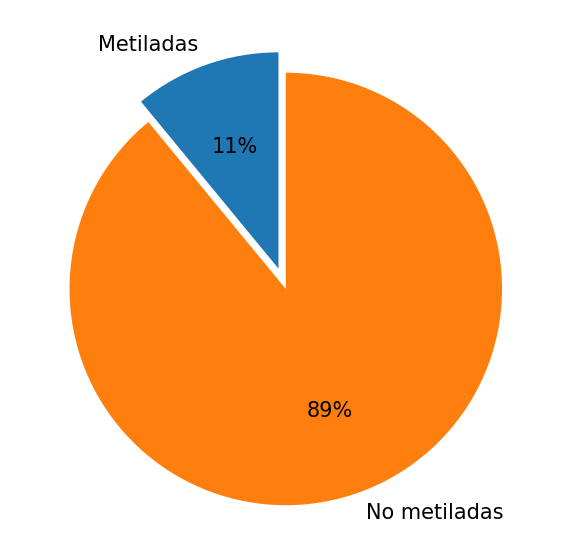

In [ ]:
#@title Cs metiladas vs no metiladas
labels = 'Metiladas', 'No metiladas'
sizes = [n_met, n_unm]
explode = (0, 0.1)

fig1, ax1 = plt.subplots(figsize=(2.2,2.2), dpi=300)
ax1.pie(sizes, 
        explode=explode, 
        labels=labels, 
        autopct='%1.0f%%',
        #shadow=True, 
        startangle=90,
        textprops={'fontsize': 5})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

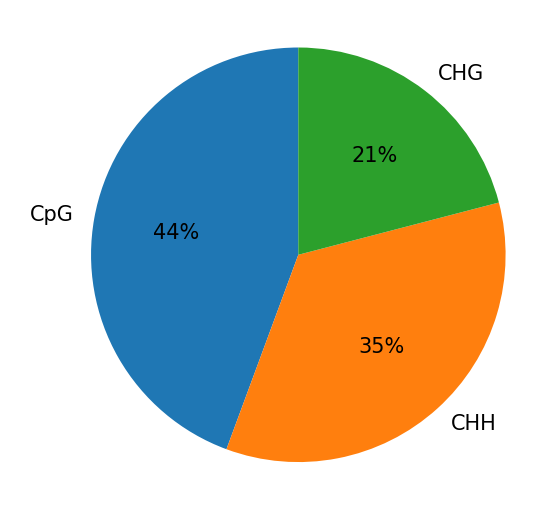

In [ ]:
#@title Contextos de metilación
labels = 'CpG', 'CHH', 'CHG'
sizes = [n_CpG, n_CHH, n_CHG]
explode = (0, 0, 0.0)

fig1, ax1 = plt.subplots(figsize=(2,2), dpi=300)
ax1.pie(sizes, 
        explode=explode, 
        labels=labels, 
        autopct='%1.0f%%',
        #shadow=True, 
        startangle=90,
        textprops={'fontsize': 5})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

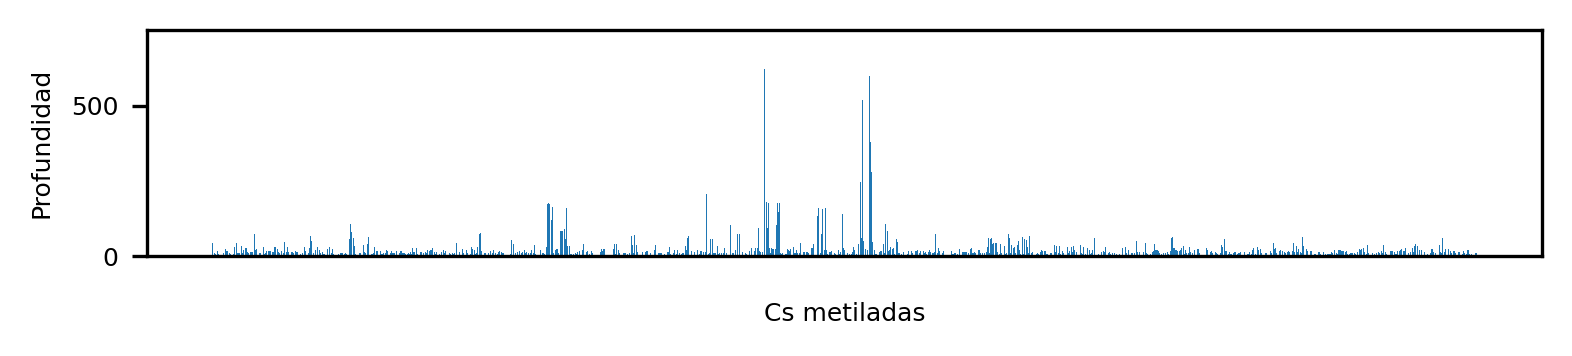

In [ ]:
#@title Profundidad de Cs metiladas
fig, ax = plt.subplots(figsize=(6,1), dpi=300)

ax.bar(range(len(depths)), depths)
plt.xlabel('Cs metiladas', fontsize=6)
plt.ylabel('Profundidad', fontsize=6)

plt.xticks(fontsize=6)
plt.yticks(fontsize=6)

ax.set_xticklabels([])

plt.tick_params(bottom=False)

#plt.tight_layout()
plt.show()